# preprocessing a dataset of restaurant reviews using the popular Natural Language Toolkit (NLTK) library

In [2]:


import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


df = pd.read_csv('train.csv')


def preprocess_text(text):
 
    text = text.lower()
    

    text = text.translate(str.maketrans('', '', string.punctuation))
    
    
    text = re.sub(r'\d+', '', text)
    
   
    tokens = word_tokenize(text)
    
 
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
   
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
  
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


df['clean_review'] = df['review'].apply(preprocess_text)


df.to_csv('preprocessed_restaurant_reviews.csv', index=False)


# code to extract reviews and corresponding aspects from a CSV file, then analyze the sentiment of each review.

In [3]:

from nltk.sentiment import SentimentIntensityAnalyzer


def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] > 0:
        return "Positive"
    elif sentiment_score['compound'] < 0:
        return "Negative"
    else:
        return "Neutral"



reviews = []   
review=[] 
t_ap=[]  
asp=[]   
rev_p = [] 
for i in df["clean_review"]:
    review.append(i)
for i in df["query_asp"]:
    asp.append(i)

j=0;

for i in review:
    sentiment = analyze_sentiment(i)
    rev=[]
    ap=[]
    rev.append(i)  
    rev_p.append(i)
    rev_p.append(sentiment)
    ap.append(asp[j])
    ap.append(sentiment)
    t_ap.append(ap)
    rev.append(asp[j])  
    rev.append(sentiment)  
    reviews.append(rev)
    j+=1
  

# Apply machine learning algorithms to the data (reviews)

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import gensim
from gensim.models import Word2Vec
import numpy as np


X = [review[0] for review in reviews]
aspects = [review[1] for review in reviews]
y = [review[2] for review in reviews]


label_encoder = LabelEncoder()
aspects_encoded = label_encoder.fit_transform(aspects)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


def text_to_embedding(text, model):
    words = text.split()
    embedding = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    if isinstance(embedding, np.ndarray):
        return embedding
    else:
        return np.zeros(model.vector_size)

X_train_embeddings = np.array([text_to_embedding(text, word2vec_model) for text in X_train])
X_test_embeddings = np.array([text_to_embedding(text, word2vec_model) for text in X_test])


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_embeddings, y_train)
svm_pred = svm_classifier.predict(X_test_embeddings)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_embeddings, y_train)
rf_pred = rf_classifier.predict(X_test_embeddings)


lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_embeddings, y_train)
lr_pred = lr_classifier.predict(X_test_embeddings)


print("\nSupport Vector Machine Classifier:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))

print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

print("\nLogistic Regression Classifier:")
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))



Support Vector Machine Classifier:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
    Positive       0.97      1.00      0.99       498

    accuracy                           0.97       513
   macro avg       0.49      0.50      0.49       513
weighted avg       0.94      0.97      0.96       513

Accuracy: 0.9707602339181286

Random Forest Classifier:
              precision    recall  f1-score   support

    Negative       1.00      0.73      0.85        15
    Positive       0.99      1.00      1.00       498

    accuracy                           0.99       513
   macro avg       1.00      0.87      0.92       513
weighted avg       0.99      0.99      0.99       513

Accuracy: 0.9922027290448343

Logistic Regression Classifier:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
    Positive       0.97      1.00      0.99       498

    accuracy                

C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metr

Naive Bayes Classifier:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
    Positive       0.97      1.00      0.99       498

    accuracy                           0.97       513
   macro avg       0.49      0.50      0.49       513
weighted avg       0.94      0.97      0.96       513

Accuracy: 0.9707602339181286



C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


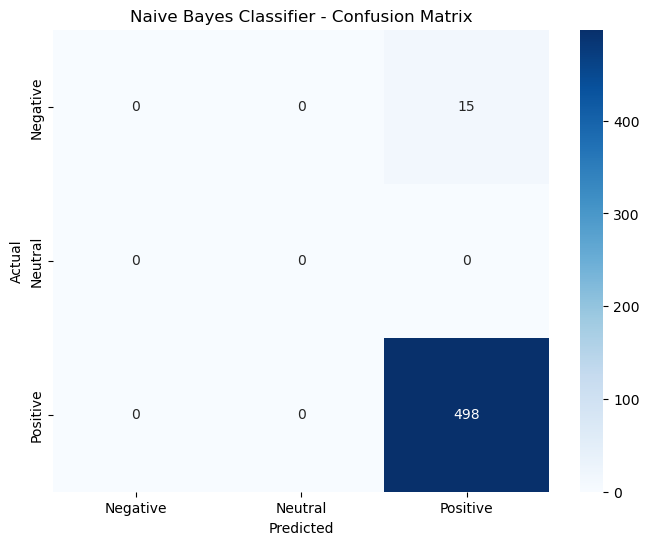

SVM Classifier:
              precision    recall  f1-score   support

    Negative       1.00      0.47      0.64        15
    Positive       0.98      1.00      0.99       498

    accuracy                           0.98       513
   macro avg       0.99      0.73      0.81       513
weighted avg       0.98      0.98      0.98       513

Accuracy: 0.9844054580896686



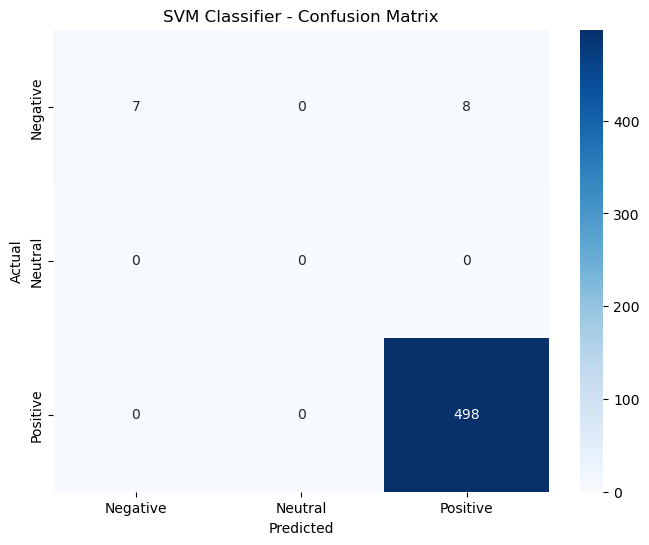

Random Forest Classifier:
              precision    recall  f1-score   support

    Negative       1.00      0.73      0.85        15
    Positive       0.99      1.00      1.00       498

    accuracy                           0.99       513
   macro avg       1.00      0.87      0.92       513
weighted avg       0.99      0.99      0.99       513

Accuracy: 0.9922027290448343



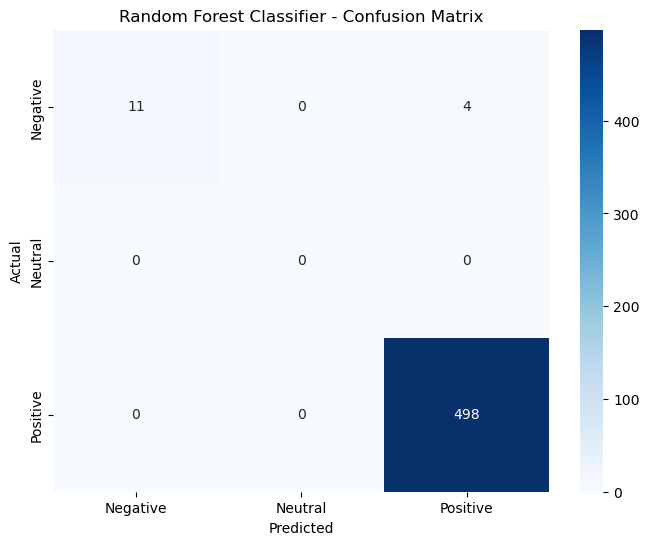

Logistic Regression Classifier:
              precision    recall  f1-score   support

    Negative       1.00      0.20      0.33        15
    Positive       0.98      1.00      0.99       498

    accuracy                           0.98       513
   macro avg       0.99      0.60      0.66       513
weighted avg       0.98      0.98      0.97       513

Accuracy: 0.9766081871345029



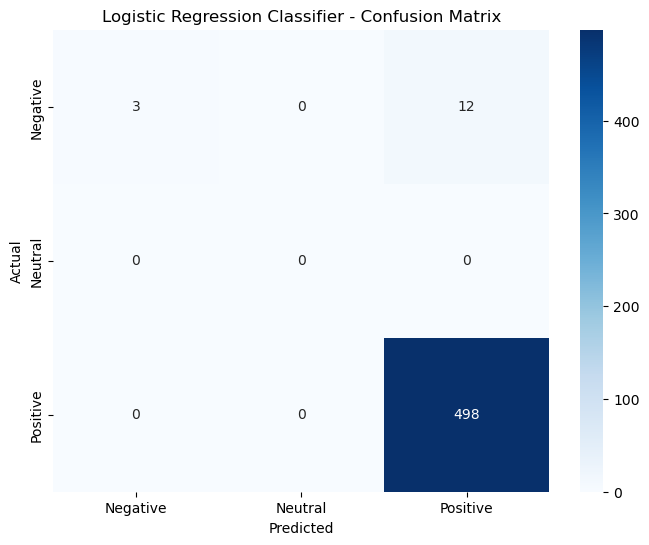

                                              Review True Sentiment  \
0  husband decided wanted try special chef menu j...       Positive   
1  spent entire summer living around corner place...       Positive   
2  food drink brunch favourite meal day mildreds ...       Positive   
3  amazing food went birthday group get set dinne...       Positive   
4  love visiting colette cafe delicious tea caffi...       Positive   
5  went ayce lunch disappointed menu fairly large...       Positive   
6  ate late lunch pad thai excellent fresh tofu f...       Positive   
7  specific craving club sandwich lately somethin...       Positive   
8  one favourite restaurant city everything amazi...       Positive   
9  love place short walk yonge bloor station came...       Positive   

  Predicted Sentiment   Classifier  
0            Positive  Naive Bayes  
1            Positive  Naive Bayes  
2            Positive  Naive Bayes  
3            Positive  Naive Bayes  
4            Positive  Naive Baye

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X = [review[0] for review in reviews]  
y = [review[2] for review in reviews]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


classifiers = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


results = []


for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    
   
    for i, review in enumerate(X_test):
        results.append({
            'Review': review,
            'True Sentiment': y_test[i],
            'Predicted Sentiment': y_pred[i],
            'Classifier': name
        })
    
   
    print(f"{name} Classifier:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print()
    
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Classifier - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


results_df = pd.DataFrame(results)


print(results_df.head(10))


results_df.to_csv('classification_results.csv', index=False)


C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JADON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                              Review True Sentiment  \
0  husband decided wanted try special chef menu j...       Positive   
1  spent entire summer living around corner place...       Positive   
2  food drink brunch favourite meal day mildreds ...       Positive   
3  amazing food went birthday group get set dinne...       Positive   
4  love visiting colette cafe delicious tea caffi...       Positive   
5  went ayce lunch disappointed menu fairly large...       Positive   
6  ate late lunch pad thai excellent fresh tofu f...       Positive   
7  specific craving club sandwich lately somethin...       Positive   
8  one favourite restaurant city everything amazi...       Positive   
9  love place short walk yonge bloor station came...       Positive   

  Predicted Sentiment   Classifier  
0            Positive  Naive Bayes  
1            Positive  Naive Bayes  
2            Positive  Naive Bayes  
3            Positive  Naive Bayes  
4            Positive  Naive Baye

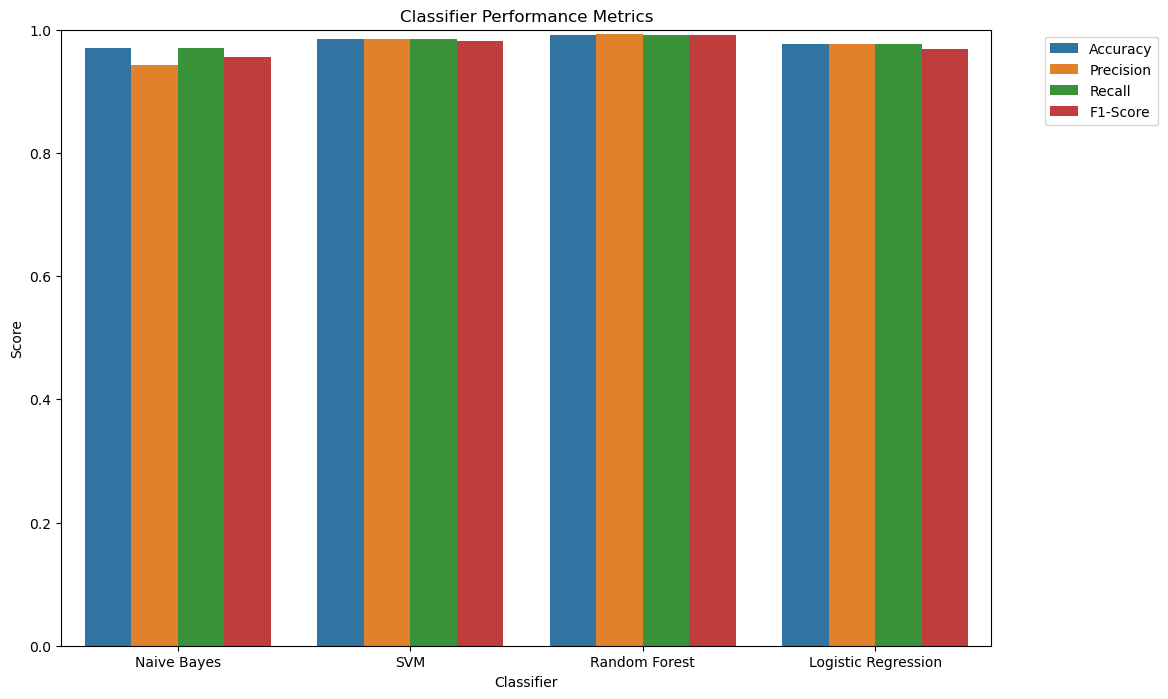

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X = [review[0] for review in reviews]  
y = [review[2] for review in reviews] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


classifiers = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


results = []
scores = []


for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    
   
    for i, review in enumerate(X_test):
        results.append({
            'Review': review,
            'True Sentiment': y_test[i],
            'Predicted Sentiment': y_pred[i],
            'Classifier': name
        })
    
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    scores.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })


results_df = pd.DataFrame(results)


print(results_df.head(10))


results_df.to_csv('classification_results.csv', index=False)


scores_df = pd.DataFrame(scores)


print(scores_df)


scores_df.to_csv('classification_scores.csv', index=False)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores_melted = pd.melt(scores_df, id_vars=['Classifier'], value_vars=metrics, 
                        var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Classifier', y='Score', hue='Metric', data=scores_melted)
plt.title('Classifier Performance Metrics')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
